# Parameter estimation with emcee 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notes</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Initializing-data" data-toc-modified-id="Initializing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initializing data</a></span><ul class="toc-item"><li><span><a href="#Using-polyfit-to-fit-data" data-toc-modified-id="Using-polyfit-to-fit-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Using polyfit to fit data</a></span></li></ul></li><li><span><a href="#emcee" data-toc-modified-id="emcee-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>emcee</a></span><ul class="toc-item"><li><span><a href="#Log-prior" data-toc-modified-id="Log-prior-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Log prior</a></span></li><li><span><a href="#Log-likelihood" data-toc-modified-id="Log-likelihood-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Log likelihood</a></span></li><li><span><a href="#Log-probability" data-toc-modified-id="Log-probability-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Log probability</a></span></li><li><span><a href="#emcee-sampler" data-toc-modified-id="emcee-sampler-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>emcee sampler</a></span></li></ul></li><li><span><a href="#Final-numbers" data-toc-modified-id="Final-numbers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final numbers</a></span></li></ul></div>

## Notes

To do: 
- plot parameter values as a function of the number of samples used 

## Libraries

In [1]:
import numpy as np

import os.path
import sys 
print("Python %s.%s.%s"%sys.version_info[:3])

import emcee
print("emcee version", emcee.__version__)

from IPython.display import display, HTML

%config InlineBackend.figure_format ='retina'
print(os.getcwd() + "\n")
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
jtplot.style(ticks = True, grid = False, figsize = (10,8))

import scipy.stats
from scipy.optimize import minimize
from scipy.optimize import basinhopping

Python 3.6.4
emcee version 2.2.1
/Users/Isabel/Documents/emcee



## Initializing data 

Data created from the following function, 

\begin{equation*}
y = \textrm{a}  \textrm{x}^7 + \textrm{b}  \textrm{x}^6 ... + \textrm{g x} + \textrm{h}
\end{equation*}

The given dataset contains data for $x$, $y$, and $\sigma_y$ (the standard error in y). Guesses for the eight parameters are obtained using a built-in polynomial fit. 

In [2]:
#import data
data = np.loadtxt( '/Users/Isabel/Documents/emcee/fake3.dat' )
print(data)

[[-4.65682077 -0.81486547  0.12344454]
 [-4.29991906 -0.36492423  0.07819792]
 [-4.29184724 -0.28447198  0.07733909]
 [-3.72085614  0.32090635  0.07229803]
 [-3.61264219  0.30678359  0.08004085]
 [-3.53130727  0.27171581  0.08564348]
 [-3.18338027  0.64116552  0.10797345]
 [-2.97305147  0.59797808  0.12041404]
 [-2.88856258  0.6997287   0.12520076]
 [-2.81833183  0.73218123  0.12908445]
 [-2.45199241  1.02102486  0.14776928]
 [-2.27300196  1.11010842  0.15576702]
 [-1.0519022   1.55311093  0.18047251]
 [-1.02879493  1.38743558  0.18032942]
 [-1.0016557   1.18832023  0.18012985]
 [-0.73288469  1.37376403  0.17631846]
 [-0.67199029  1.45670582  0.17499593]
 [-0.60528268  1.12294502  0.17335612]
 [-0.50371043  1.05838939  0.17048208]
 [-0.47044378  1.47897596  0.16944353]
 [-0.35098849  1.03586882  0.16532939]
 [-0.3391154   1.34358767  0.16488824]
 [ 0.14700538  0.84694616  0.14230317]
 [ 0.39083339  0.95205542  0.12817935]
 [ 0.56877302  0.69335419  0.11701462]
 [ 0.7919807   0.4834532 

### Using polyfit to fit data

Data visualization

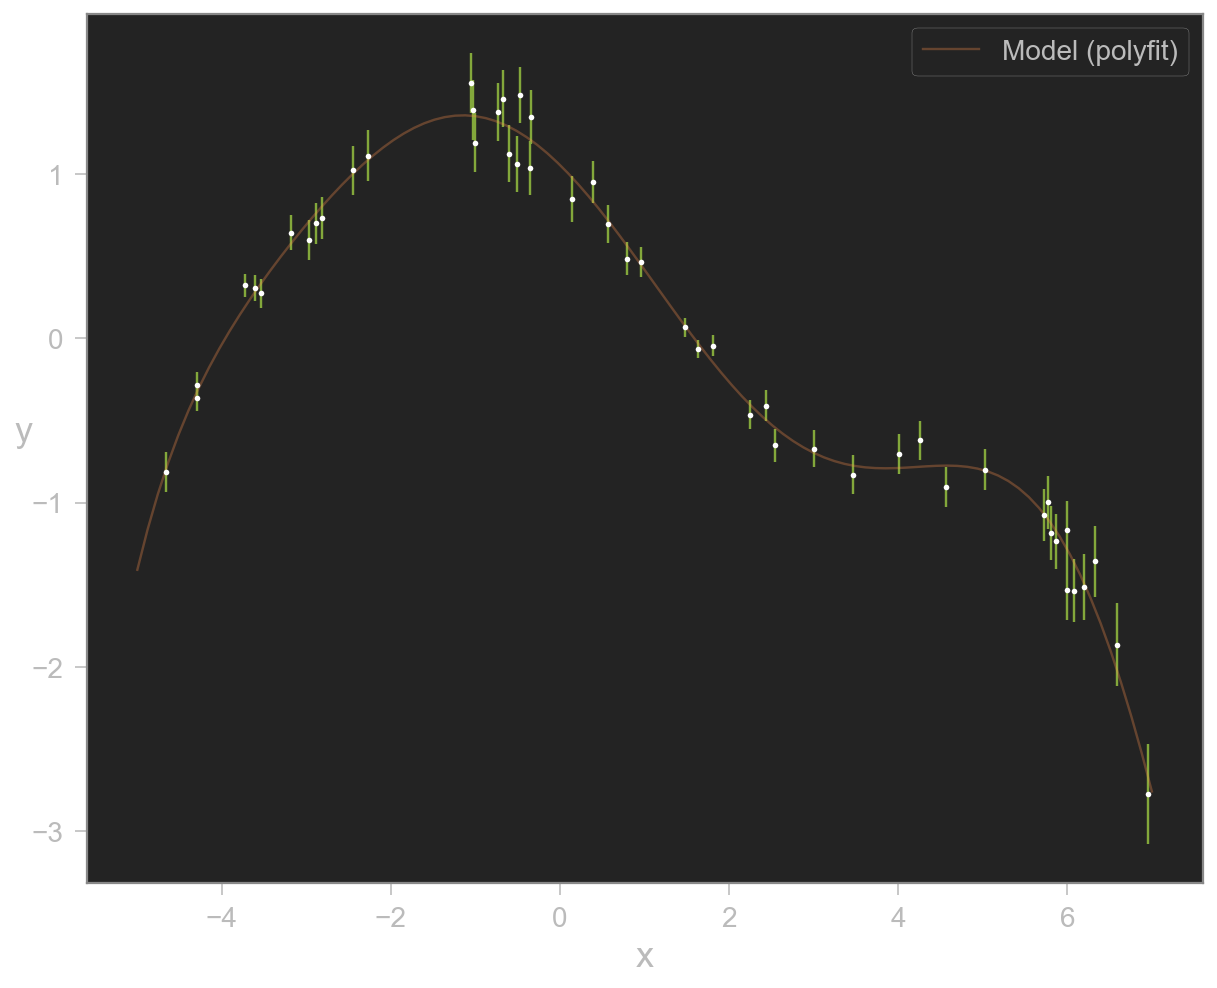

In [3]:
var1 = data[0:,0]
var2 = data[0:,1]
var3 = data[0:,2]
 

x = np.copy(var1)
y = np.copy(var2)
yerr = np.copy(var3)

p7 = np.polyfit(x,y,7)

f = np.poly1d(p7)

xnew = np.linspace(-5,7,100)
ynew = f(xnew)

plt.figure(figsize=(10,8))
plt.errorbar(x,y,yerr=yerr, fmt=".w", ecolor='g')
plt.plot(xnew, ynew, 'y',alpha = 0.3, label ="Model (polyfit)")
plt.legend(fontsize = 14)
plt.xlabel("x", fontsize= 18)
plt.ylabel("y", fontsize= 18, rotation =0)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.show()

## emcee

Functions for determining log priors, likelihood, and probability to determine ML estimates for emcee to use.

### Log prior 

Stuff about this here.

In [4]:
def log_prior(theta): 
    a, b, c, d, e, f, g, h = theta
    if -5.0 < a < 5.0 and -5.0 < b < 5.0 and -5.0 < c < 5.0 and -5.0 < d < 5.0 and -5.0 < e < 5.0 and -5.0 < f < 5.0 and -5.0 < g < 5.0 and -5.0 < h < 5.0:
        return 0.0
    return -np.inf

### Log likelihood 

Stuff about this here.

In [5]:
def log_likelihood(theta, x, y, yerr): 
    a, b, c, d, e, f, g, h = theta
    model = a * x ** 7 + b * x ** 6 + c * x ** 5 + d * x ** 4 + e * x ** 3 + f * x **2 + g * x + h
    return -0.5 * np.sum(((y-model)**2/yerr**2))

### Log probability 

Stuff about this here.

In [6]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [7]:
x = np.copy(var1)
y = np.copy(var2)
yerr = np.copy(var3)
initial = np.array([p7[i] for i in range(8)]) + 0.1* np.random.randn(8)
initial = np.asarray(initial)

n11 = lambda *args: -log_likelihood(*args)
minimizer_kwargs = dict(method="Nelder-Mead", args = (x, y, yerr))
soln = basinhopping(n11, initial, T=1.0, stepsize =0.01, niter = 200, minimizer_kwargs=minimizer_kwargs)
print(soln)
pos = soln.x + 1e-4 * np.random.randn(100,8)
nwalkers, ndim = pos.shape

a_ml, b_ml, c_ml, d_ml, e_ml, f_ml, g_ml, h_ml = soln.x

                        fun: 16.684039386760478
 lowest_optimization_result:  final_simplex: (array([[  2.96674194e-05,  -2.86565678e-04,  -1.22961402e-03,
          1.13250673e-02,   3.47516802e-02,  -1.97610886e-01,
         -4.64929992e-01,   1.05122407e+00],
       [  2.96707627e-05,  -2.86592937e-04,  -1.22987232e-03,
          1.13270789e-02,   3.47541959e-02,  -1.97633009e-01,
         -4.64920641e-01,   1.05124181e+00],
       [  2.96855445e-05,  -2.86692704e-04,  -1.23030232e-03,
          1.13296756e-02,   3.47585249e-02,  -1.97645853e-01,
         -4.64933247e-01,   1.05122326e+00],
       [  2.96867109e-05,  -2.86704391e-04,  -1.23036123e-03,
          1.13304718e-02,   3.47589708e-02,  -1.97659149e-01,
         -4.64945992e-01,   1.05125790e+00],
       [  2.96716500e-05,  -2.86610501e-04,  -1.22974665e-03,
          1.13264792e-02,   3.47534708e-02,  -1.97614176e-01,
         -4.64955008e-01,   1.05120923e+00],
       [  2.96946448e-05,  -2.86723083e-04,  -1.23066024e-03,

### emcee sampler 

Stuff about this (sampling, corner plots) here.

In [8]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 500)

(array([[  3.30851284e-05,  -2.72132465e-04,  -1.55099973e-03,
           1.08362037e-02,   4.05485010e-02,  -1.89876268e-01,
          -4.83391421e-01,   1.04248518e+00],
        [  3.17985637e-05,  -2.66052280e-04,  -1.53300742e-03,
           1.04087984e-02,   4.35281451e-02,  -1.86330894e-01,
          -5.23703566e-01,   1.04414150e+00],
        [  2.90316712e-05,  -2.78330406e-04,  -1.30115035e-03,
           1.12293999e-02,   3.79847464e-02,  -2.00894495e-01,
          -4.98408682e-01,   1.08275741e+00],
        [  1.89426234e-05,  -1.96341162e-04,  -1.01329112e-03,
           8.55075225e-03,   3.50619712e-02,  -1.77463181e-01,
          -4.69615355e-01,   1.02619983e+00],
        [  1.84532730e-05,  -2.04332124e-04,  -6.15076342e-04,
           7.93454659e-03,   2.20901582e-02,  -1.62086060e-01,
          -3.92545851e-01,   9.78468670e-01],
        [  2.17392236e-05,  -1.85714155e-04,  -1.23003187e-03,
           8.12920808e-03,   3.90914578e-02,  -1.71959341e-01,
          -4.9

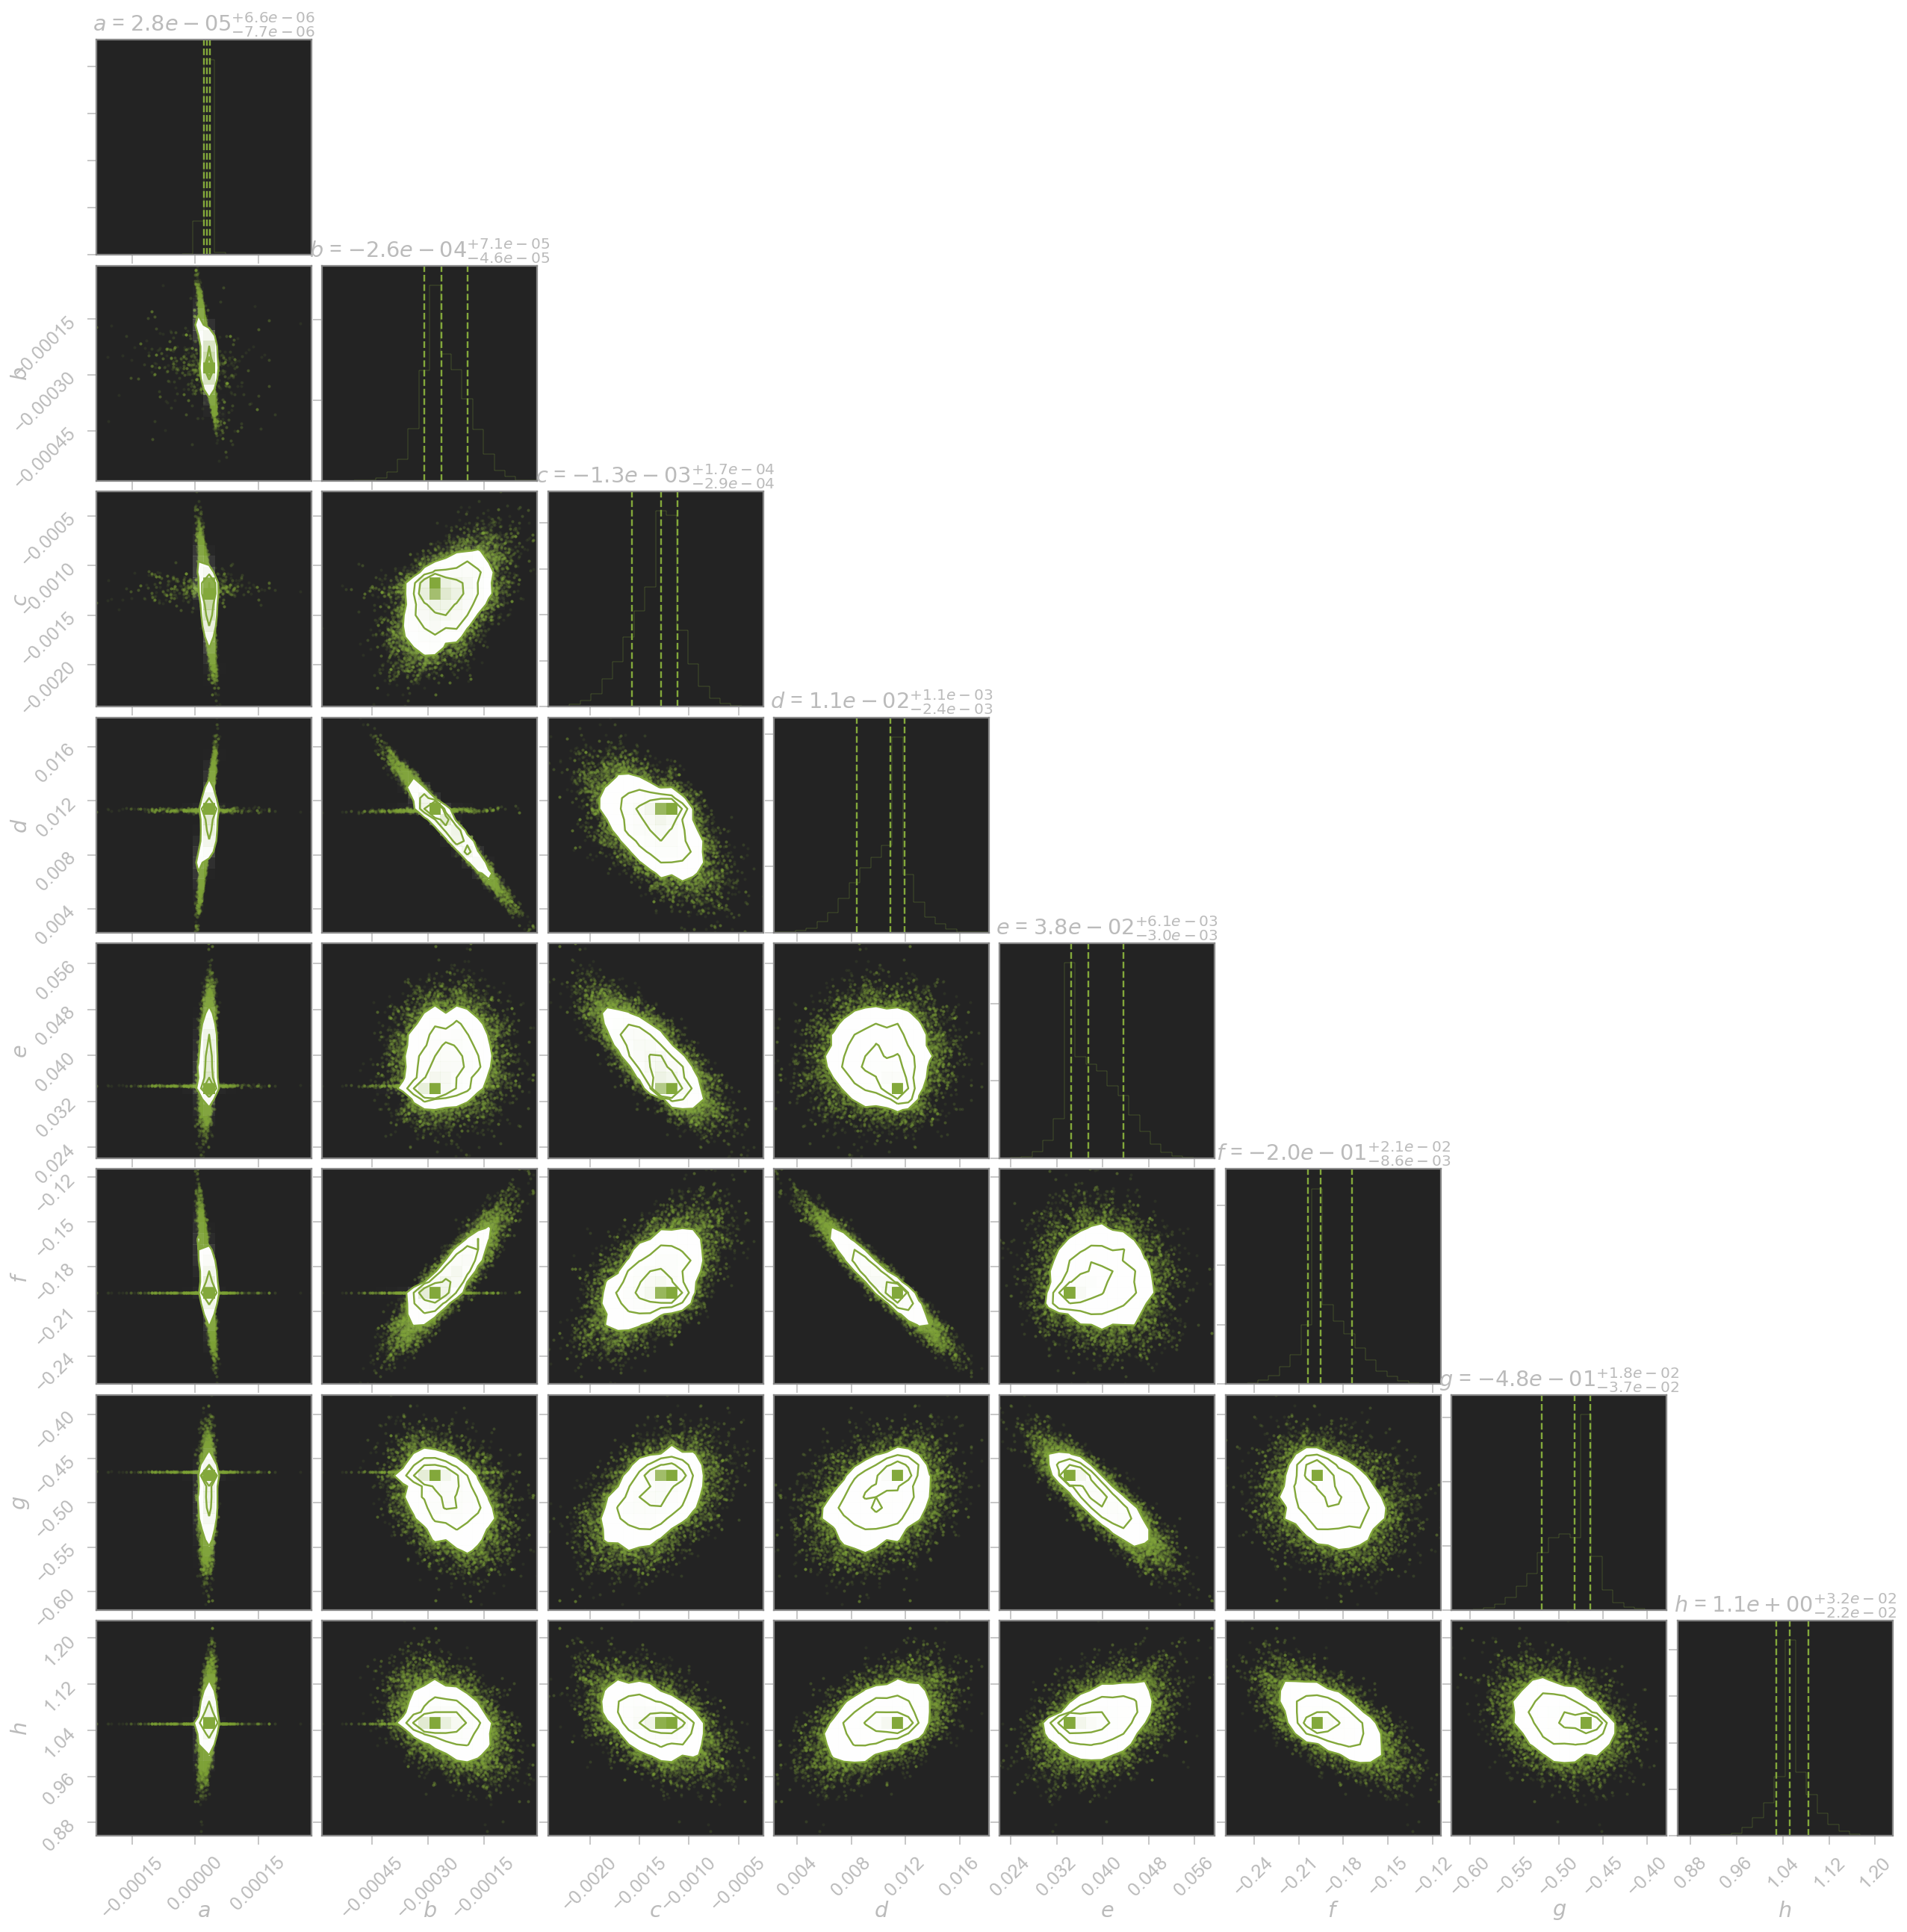

In [9]:
samples = sampler.chain[:, :, :].reshape((-1,ndim))

import corner
fig = corner.corner(samples, labels=["$a$", "$b$", "$c$", "$d$", "$e$", "$f$","$g$","$h$"], 
                    quantiles=[0.16, 0.5, 0.84], color = 'g', show_titles=True, 
                     title_fmt='.1e',  figsize=(10,10))
fig.savefig("triangle.png")

## Final numbers

In [10]:
#samples[:,2] = np.exp(samples[:,2])

a_mcmc, b_mcmc, c_mcmc, d_mcmc, e_mcmc,  f_mcmc, g_mcmc, h_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

In [11]:
print("MCMC estimates:")
print("a = {0:0.3e} ".format(a_mcmc[0]), ",", "+ {0:0.3e}" .format(a_mcmc[1]), ",", "- {0:0.3e}".format(a_mcmc[2])) 
print("b = {0:0.3e} ".format(b_mcmc[0]), ",", "+ {0:0.3e}" .format(b_mcmc[1]), ",", "- {0:0.3e}".format(b_mcmc[2])) 
print("c = {0:0.3e} ".format(c_mcmc[0]), ",", "+ {0:0.3e}" .format(c_mcmc[1]), ",", "- {0:0.3e}".format(c_mcmc[2])) 
print("d = {0:0.3e} ".format(d_mcmc[0]), ",", "+ {0:0.3e}" .format(d_mcmc[1]), ",", "- {0:0.3e}".format(d_mcmc[2])) 
print("e = {0:0.3e} ".format(e_mcmc[0]), ",", "+ {0:0.3e}" .format(e_mcmc[1]), ",", "- {0:0.3e}".format(e_mcmc[2])) 
print("f = {0:0.3e} ".format(f_mcmc[0]), ",", "+ {0:0.3e}" .format(f_mcmc[1]), ",", "- {0:0.3e}".format(f_mcmc[2])) 
print("g = {0:0.3e} ".format(g_mcmc[0]), ",", "+ {0:0.3e}" .format(g_mcmc[1]), ",", "- {0:0.3e}".format(g_mcmc[2])) 
print("h = {0:0.3e} ".format(h_mcmc[0]), ",", "+ {0:0.3e}" .format(h_mcmc[1]), ",", "- {0:0.3e}".format(h_mcmc[2])) 

print("---------------------")
print("Initial guesses:")
print("a = {0:0.3e}".format(p7[0]))
print("b = {0:0.3e}".format(p7[1]))
print("c = {0:0.3e}".format(p7[2])) 
print("d = {0:0.3e}".format(p7[3])) 
print("e = {0:0.3e}".format(p7[4])) 
print("f = {0:0.3e}".format(p7[5])) 
print("g = {0:0.3e}".format(p7[6])) 
print("h = {0:0.3e}".format(p7[7])) 

print("---------------------")
print("Maximum likelihood estimates:")
print("a = {0:0.3e}".format(a_ml))
print("b = {0:0.3e}".format(b_ml))
print("c = {0:0.3e}".format(c_ml)) 
print("d = {0:0.3e}".format(d_ml)) 
print("e = {0:0.3e}".format(e_ml)) 
print("f = {0:0.3e}".format(f_ml)) 
print("g = {0:0.3e}".format(g_ml)) 
print("h = {0:0.3e}".format(h_ml)) 

#print("g = {0:0.3e}".format(d_ml)) 
#print("h = {0:0.3e}".format(d_ml)) 


MCMC estimates:
a = 2.848e-05  , + 6.581e-06 , - 7.723e-06
b = -2.642e-04  , + 7.138e-05 , - 4.560e-05
c = -1.283e-03  , + 1.672e-04 , - 2.943e-04
d = 1.087e-02  , + 1.058e-03 , - 2.448e-03
e = 3.752e-02  , + 6.057e-03 , - 2.985e-03
f = -1.953e-01  , + 2.130e-02 , - 8.585e-03
g = -4.822e-01  , + 1.767e-02 , - 3.690e-02
h = 1.051e+00  , + 3.229e-02 , - 2.244e-02
---------------------
Initial guesses:
a = 2.126e-05
b = -1.926e-04
c = -1.213e-03
d = 8.486e-03
e = 3.971e-02
f = -1.781e-01
g = -5.061e-01
h = 1.053e+00
---------------------
Maximum likelihood estimates:
a = 2.967e-05
b = -2.866e-04
c = -1.230e-03
d = 1.133e-02
e = 3.475e-02
f = -1.976e-01
g = -4.649e-01
h = 1.051e+00
